In [72]:
import numpy as np
import matplotlib.pyplot as plt
import polars as pl
import seaborn as sns
from matplotlib.ticker import MaxNLocator

from pathlib import Path
from tqdm.notebook import tqdm

sns.set_theme()
# sequence - features
# family_accession labels

In [73]:
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

In [74]:
n_files = 5  # no of files to use

df = pl.concat(
    [pl.read_csv(f"data/train/data-000{i:02d}-of-00080") for i in range(n_files)]
)
df

family_id,sequence_name,family_accession,aligned_sequence,sequence
str,str,str,str,str
"""GMC_oxred_C""","""A4WZS5_RHOS5/416-539""","""PF05199.13""","""PHPE.SRIRLST.RRDAHGMP.....IP.R…","""PHPESRIRLSTRRDAHGMPIPRIESRLGPD…"
"""DUF2887""","""K9QI92_9NOSO/3-203""","""PF11103.8""","""RDSIYYQIFKRFPALIFEL..VD.NRPPQA…","""RDSIYYQIFKRFPALIFELVDNRPPQAQNY…"
"""zf-IS66""","""Q92LC9_RHIME/32-75""","""PF13005.7""",""".TCCPDCGG.E..LRLVGED.AS....EIL…","""TCCPDCGGELRLVGEDASEILDMIAAQMKV…"
"""Asp_decarbox""","""X2GQZ4_9BACI/1-115""","""PF02261.16""","""MLRMMMNSKIHRATVTEADLNYVGSITIDE…","""MLRMMMNSKIHRATVTEADLNYVGSITIDE…"
"""Filamin""","""A7SQM3_NEMVE/342-439""","""PF00630.19""","""TACPKQ.CTA....RGLG............…","""TACPKQCTARGLGLKAAPVTQPTRFVVILN…"
…,…,…,…,…
"""Tub_N""","""F1RNI1_PIG/29-238""","""PF16322.5""","""RQRALLEQKQKKKRQEPL.MVQANADGR..…","""RQRALLEQKQKKKRQEPLMVQANADGRPRS…"
"""Phospho_p8""","""A0A1X7VUV4_AMPQE/3-63""","""PF10195.9""","""HIYFDEYDY.FNFGSGFDKMFPDNKNTGHS…","""HIYFDEYDYFNFGSGFDKMFPDNKNTGHSK…"
"""E3_binding""","""D5QEH1_KOMHA/126-161""","""PF02817.17""","""VFASPVAR.RLARLHEL....DLR..RV..…","""VFASPVARRLARLHELDLRRVGGSGPRGRI…"


In [75]:
df.describe()

statistic,family_id,sequence_name,family_accession,aligned_sequence,sequence
str,str,str,str,str,str
"""count""","""67892""","""67892""","""67892""","""67892""","""67892"""
"""null_count""","""0""","""0""","""0""","""0""","""0"""
"""mean""",null,null,null,null,null
"""std""",null,null,null,null,null
"""min""","""14-3-3""","""108_SOLLC/35-99""","""PF00001.21""","""..............................…","""AAAAAGVIPVGDSRVYGAVFDKGRKLTVNQ…"
"""25%""",null,null,null,null,null
"""50%""",null,null,null,null,null
"""75%""",null,null,null,null,null
"""max""","""zn-ribbon_14""","""ZWILC_BOVIN/31-571""","""PF18871.1""","""YYYQGGFKV..........LD.IPYDRNYE…","""YYYQGGFKVLDIPYDRNYERETSLESNYLS…"


In [76]:
# sequences are not unique across the 80 files - should also check if labels are unique
seq_counts = df["sequence"].value_counts().sort("count", descending=True)
seq_counts

sequence,count
str,u32
"""GLYHLTSDSSPAVCISTDAPLLIHNRLGHP…",3
"""AATLNNLAVLYGKRGKYKEAEPLCKRALEI…",2
"""RMFVVFAAVKKSKETEETRCLQVIGKANNM…",2
"""TLYMTSCPRDTIAVADASTDTSLWHRRLGH…",2
"""PENLWWRLLHMILIAIMINLAQTILAVVTV…",1
…,…
"""IFRVPAHVRDANKELYEPRLVSVGPYYRGR…",1
"""SQLKVMWETLRQNKAAVVGLFIIGFLVLIA…",1
"""SKRWVAVRDSLAFLDEPQIPYRRYHEICQE…",1


In [77]:
repeats = (
    df.group_by("sequence")
    .agg(
        pl.col("family_accession").n_unique().alias("n_labels"), pl.len().alias("count")
    )
    .filter(pl.col("count") > 1)
    .filter(pl.col("n_labels") > 1)
)

for row in repeats.iter_rows(named=True):
    print(f"{row['sequence']} has {row['n_labels']} different labels")

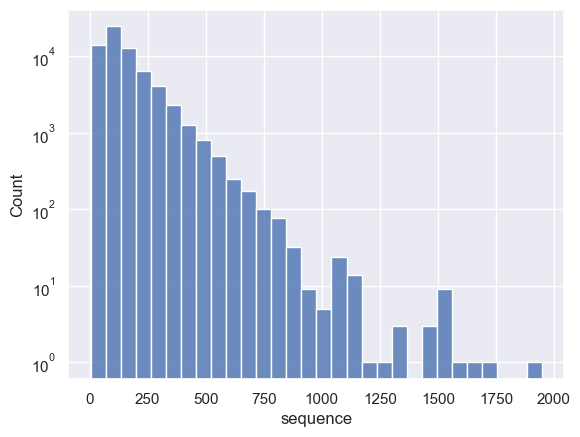

In [78]:
# sequences of different lengths, longest is almost 2000 tokens, could be problematic context window
sns.histplot(
    x=df["sequence"].str.len_chars(), bins=30, alpha=0.8, edgecolor="white", log=True
);

In [79]:
df["family_id"].value_counts(sort=True).head(10)

family_id,count
str,u32
"""Methyltransf_25""",218
"""LRR_1""",125
"""Acetyltransf_7""",119
"""His_kinase""",105
"""Lum_binding""",105
"""Bac_transf""",102
"""DnaJ_CXXCXGXG""",86
"""Glycos_trans_3N""",85
"""Chromate_transp""",83


In [80]:
MAX_LEN = 0
splits = ["train", "dev", "test"]
for split in splits:
    print(f"Split {split}")
    for fpath in tqdm(Path(f"data/{split}").iterdir()):
        max_batch_len = pl.read_csv(fpath)["sequence"].str.len_chars().max()
        MAX_LEN = max(MAX_LEN, max_batch_len)

Split train


0it [00:00, ?it/s]

Split dev


0it [00:00, ?it/s]

Split test


0it [00:00, ?it/s]

In [81]:
MAX_LEN

2037

In [82]:
# out of memory or really slow from upwards of 10 files, do this by chunk if we want combined
PAD_TOKEN = "-"


def tokenize(df, pad_token="-", max_len=2037):
    return (
        df.select(
            pl.col("sequence")
            .str.split("")
            .list.to_struct(fields=[str(i) for i in range(max_len)])
        )
        .unnest("sequence")
        .fill_null(pad_token)
    )


df_split = tokenize(df, pad_token=PAD_TOKEN, max_len=MAX_LEN)
df_split

0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,…,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036
str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,…,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
"""P""","""H""","""P""","""E""","""S""","""R""","""I""","""R""","""L""","""S""","""T""","""R""","""R""","""D""","""A""","""H""","""G""","""M""","""P""","""I""","""P""","""R""","""I""","""E""","""S""","""R""","""L""","""G""","""P""","""D""","""A""","""F""","""A""","""R""","""L""","""R""","""F""",…,"""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-"""
"""R""","""D""","""S""","""I""","""Y""","""Y""","""Q""","""I""","""F""","""K""","""R""","""F""","""P""","""A""","""L""","""I""","""F""","""E""","""L""","""V""","""D""","""N""","""R""","""P""","""P""","""Q""","""A""","""Q""","""N""","""Y""","""R""","""F""","""E""","""S""","""V""","""E""","""V""",…,"""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-"""
"""T""","""C""","""C""","""P""","""D""","""C""","""G""","""G""","""E""","""L""","""R""","""L""","""V""","""G""","""E""","""D""","""A""","""S""","""E""","""I""","""L""","""D""","""M""","""I""","""A""","""A""","""Q""","""M""","""K""","""V""","""I""","""E""","""V""","""A""","""R""","""L""","""K""",…,"""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-"""
"""M""","""L""","""R""","""M""","""M""","""M""","""N""","""S""","""K""","""I""","""H""","""R""","""A""","""T""","""V""","""T""","""E""","""A""","""D""","""L""","""N""","""Y""","""V""","""G""","""S""","""I""","""T""","""I""","""D""","""E""","""D""","""I""","""L""","""D""","""A""","""V""","""G""",…,"""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-"""
"""T""","""A""","""C""","""P""","""K""","""Q""","""C""","""T""","""A""","""R""","""G""","""L""","""G""","""L""","""K""","""A""","""A""","""P""","""V""","""T""","""Q""","""P""","""T""","""R""","""F""","""V""","""V""","""I""","""L""","""N""","""D""","""C""","""H""","""G""","""Q""","""P""","""L""",…,"""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-""","""-"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""R""","""Q""","""R""","""A""","""L""","""L""","""E""","""Q""","""K""","""Q""","""K""","""K""","""K""","""R""","""Q""","""E""","""P""","""L""","""M""","""V""","""Q""","""A""","""N""","""A""","""D""","""G""","""R""","""P""","""R""","""S""","""R""","""R""","""A""","""R""","""Q""","""S""","""E""

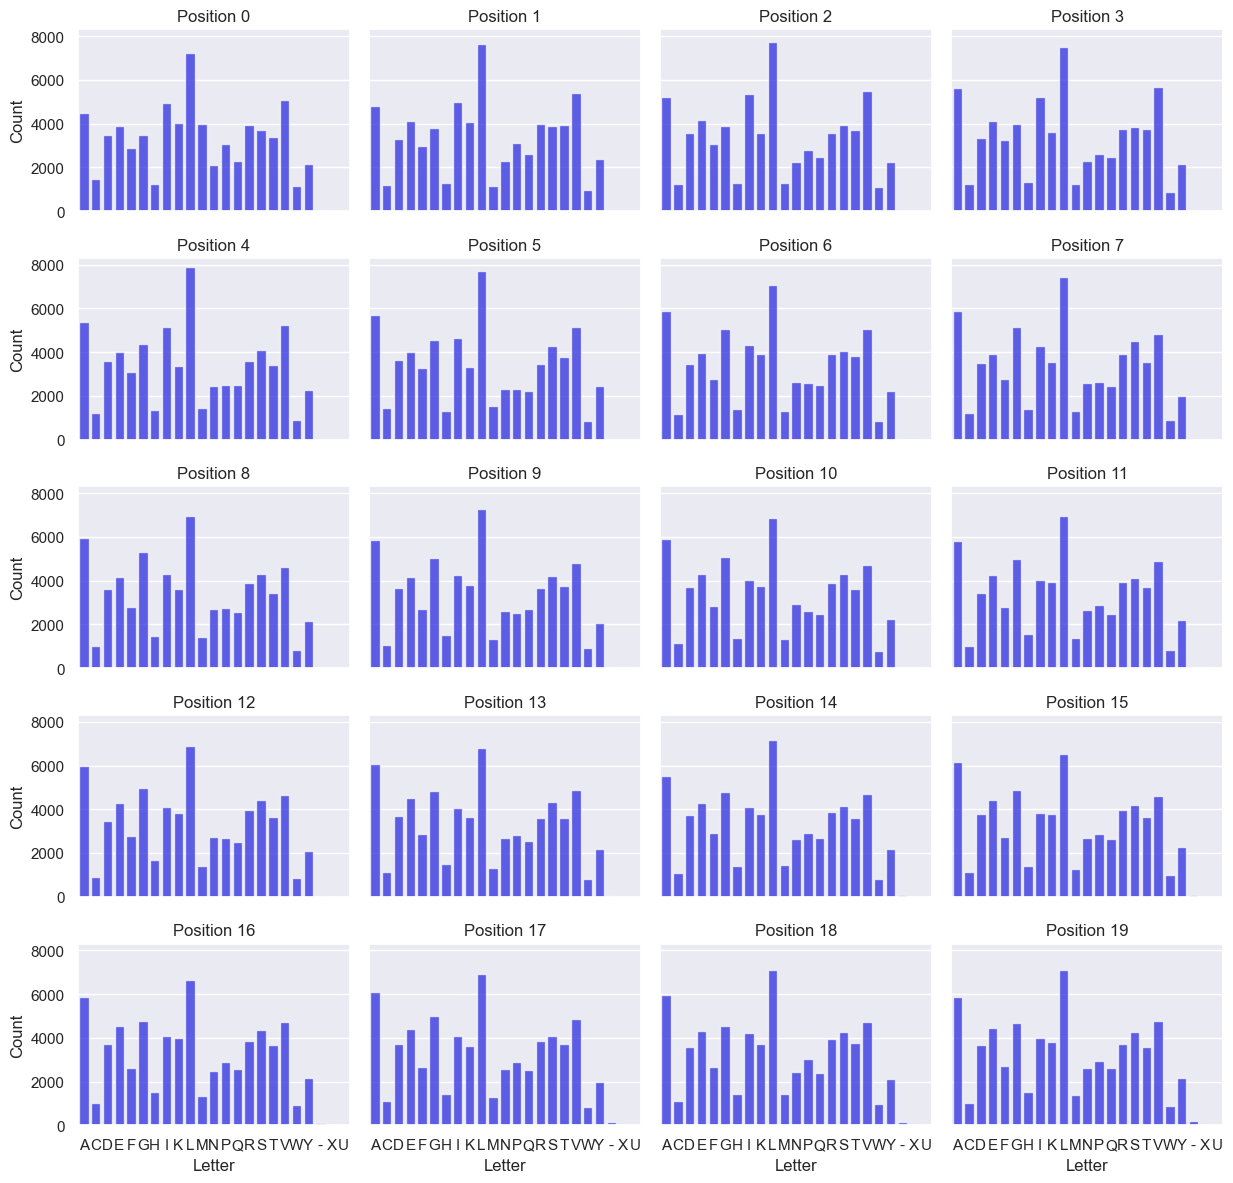

In [90]:
# plot first 20 positions, all look pretty similar
n_pos = 20
start = 0
positions_to_plot = range(start, start + n_pos)

n_cols = 4
n_rows = n_pos // n_cols
fig, axes = plt.subplots(
    n_rows, n_cols, figsize=(2.5 * n_rows, 3 * n_cols), sharey=True, sharex=True
)

for i, col in enumerate(positions_to_plot):
    r, c = divmod(i, n_cols)
    ax = axes[r, c]
    counts = df_split.get_column(str(col)).value_counts().sort(by=str(col))
    sns.barplot(
        x=counts.get_column(str(col)),
        y=counts.get_column("count"),
        ax=ax,
        color="blue",
        alpha=0.7,
        edgecolor="white",
    )
    ax.set_title(f"Position {col}")
    ax.set_xlabel("Letter")
    ax.set_ylabel("Count")

plt.tight_layout()
plt.show()

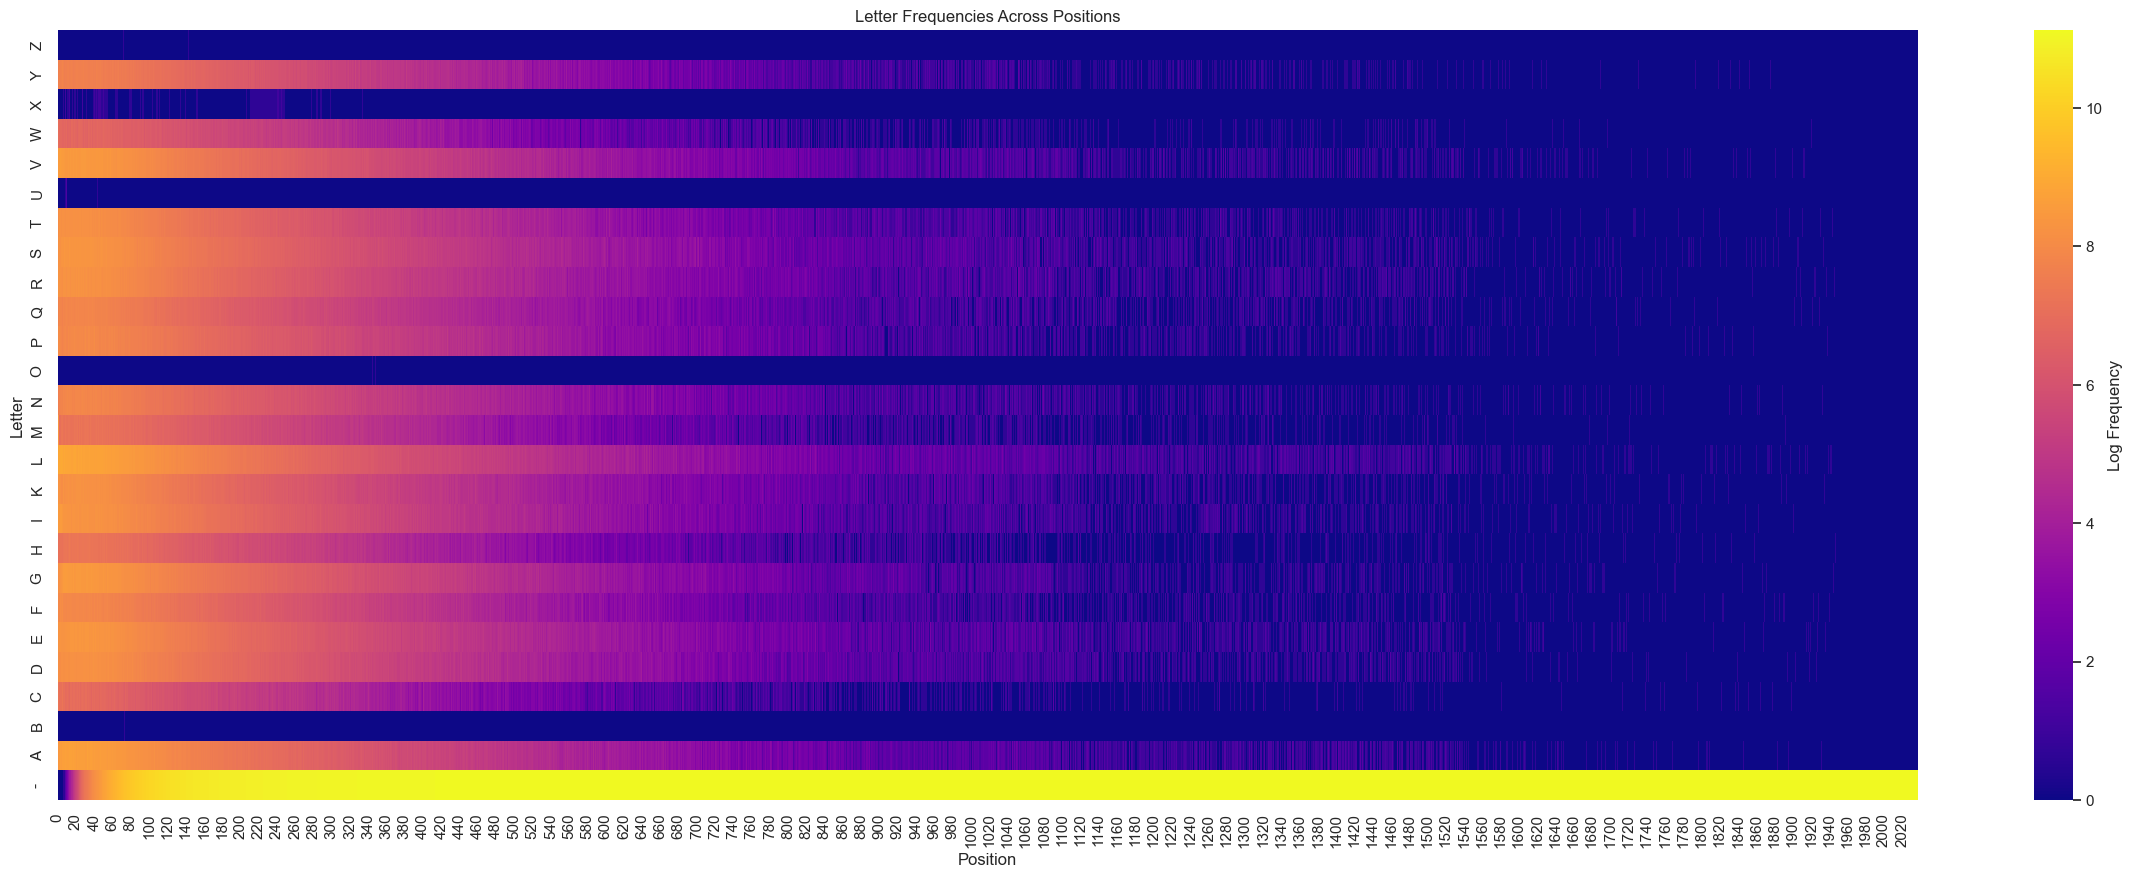

In [96]:
import pandas as pd

freq = pd.DataFrame(df_split).apply(lambda x: np.log(1 + x.value_counts())).fillna(0)
freq = freq.sort_index(ascending=False)

plt.figure(figsize=(30, 10))
sns.heatmap(freq, cmap="plasma", cbar_kws={"label": "Log Frequency"})
plt.xlabel("Position")
plt.ylabel("Letter")
plt.title("Letter Frequencies Across Positions")
plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=20))

# Control tick size as a lot of columns
step = 20
tick_positions = range(0, len(freq.columns), step)
tick_labels = freq.columns[::step]
plt.xticks(tick_positions, tick_labels, rotation=90)
plt.show()

Observations:
1. X, U, B, O, Z are particularly rare across all positions as stated by the dataset
2. The pad token frequency after around 200 increases to near max - most proteins are shorter than this
3. A,D,L,R,V are quite common 
4. striation/banded pattern behaviour - after the frequency of observing an acid goes down significantly, there are a lot of gaps in the heat map - not necessarily periodic, but not completely random either.

### Labels exploration
Basic things to get idea of:
- number of categories
- frequency distribution of categories (i.e. class imbalance)
- how many families/versions within each?

Counts distribution is highly skewed toward zero, most labels occur under 100 times, max is ~427 from the first 10 datasets.
Definitely going to need to deal with class imbalance appropriately (eg. weighted losses, balanced accuracy/precision/recall metrics, stratified sampling)

-  will also require a way to deal with unknown classes not seen at test time from training set

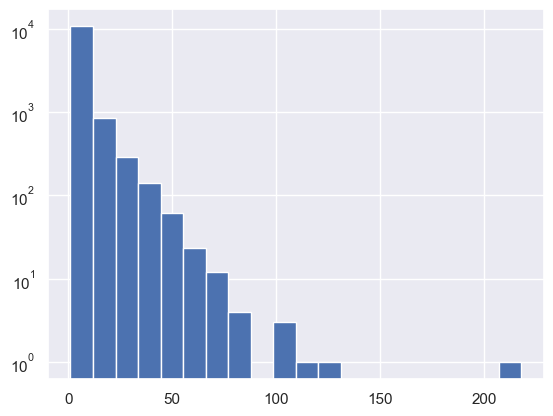

In [21]:
plt.hist(df["family_accession"].value_counts()["count"], log=True, bins=20);

In [23]:
df["family_accession"].value_counts(sort=True).head(10)

family_accession,count
str,u32
"""PF13649.6""",218
"""PF00560.33""",125
"""PF13508.7""",119
"""PF06580.13""",105
"""PF00677.17""",105
"""PF02397.16""",102
"""PF00684.19""",86
"""PF02885.17""",85
"""PF02417.15""",83


In [24]:
df["family_accession"].value_counts(sort=True).head(10)

family_accession,count
str,u32
"""PF13649.6""",218
"""PF00560.33""",125
"""PF13508.7""",119
"""PF06580.13""",105
"""PF00677.17""",105
"""PF02397.16""",102
"""PF00684.19""",86
"""PF02885.17""",85
"""PF02417.15""",83


In [28]:
df = (
    df.with_columns(pl.col("family_accession").str.split_exact(".", 1).alias("split"))
    .unnest("split")
    .rename({"field_0": "Family", "field_1": "Version"})
)
df["Family"].value_counts(sort=True).head(10)

Family,count
str,u32
"""PF13649""",218
"""PF00560""",125
"""PF13508""",119
"""PF06580""",105
"""PF00677""",105
"""PF02397""",102
"""PF00684""",86
"""PF02885""",85
"""PF02417""",83


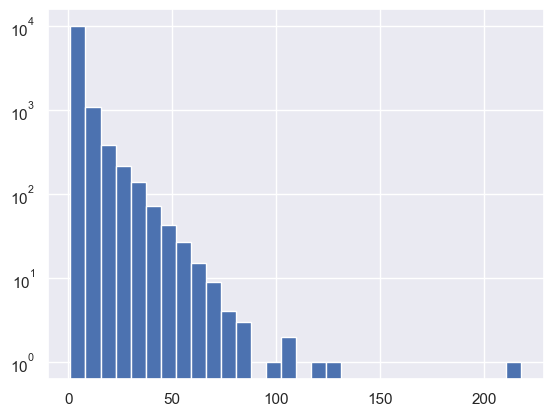

In [29]:
plt.hist(df["Family"].value_counts()["count"].to_numpy(), log=True, bins=30);

(array([11.,  3.,  2.,  0.,  3.,  3.,  1.,  0.,  1.,  1.,  0.,  1.,  1.,
         2.,  0.,  1.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.]),
 array([   2.        ,   61.36666667,  120.73333333,  180.1       ,
         239.46666667,  298.83333333,  358.2       ,  417.56666667,
         476.93333333,  536.3       ,  595.66666667,  655.03333333,
         714.4       ,  773.76666667,  833.13333333,  892.5       ,
         951.86666667, 1011.23333333, 1070.6       , 1129.96666667,
        1189.33333333, 1248.7       , 1308.06666667, 1367.43333333,
        1426.8       , 1486.16666667, 1545.53333333, 1604.9       ,
        1664.26666667, 1723.63333333, 1783.        ]),
 <BarContainer object of 30 artists>)

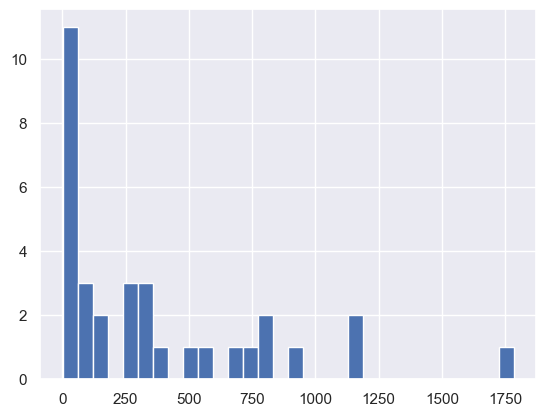

In [35]:
# each protein could have hundreds-thousands of versions
vc = (
    df.group_by("Family")
    .agg(pl.col("Version").max().alias("Version"))
    .get_column("Version")
    .value_counts()
)
plt.hist(vc["count"], bins=30)

In [36]:
# 12000 + families
df["Family"].unique()

Family
str
"""PF17132"""
"""PF05717"""
"""PF08337"""
"""PF11521"""
"""PF12531"""
…
"""PF13314"""
"""PF08955"""
"""PF16102"""


### Questions:
1. What is the biological meaning of protein families/version numbers, how might a model learn similar protein families?
2. Are some predictions worse than others, should we penalise accordingly? eg. right family right version? Multilabel? Might a two-step process where we first predict the family, then given a family predict the version
be easier than an end to end solution?
3. Do the other data columns hold any useful information? Obviously, start with just the sequence itself.

### Understand number of labels in each split
* Get no. labels in each split
* how many labels are shared? are any missing from the train set but in the dev/test sets?

In [37]:
from pathlib import Path
from tqdm.notebook import tqdm
from collections import defaultdict

split_labels = defaultdict(set)
splits = ["train", "dev", "test"]

for split in splits:
    print(f"Split: {split}")
    for path in tqdm(Path(f"data/{split}").iterdir()):
        if not path.is_file():
            continue

        split_labels[split].update(pl.read_csv(path)["family_accession"].unique())

Split: train


0it [00:00, ?it/s]

Split: dev


0it [00:00, ?it/s]

Split: test


0it [00:00, ?it/s]

In [38]:
for split in splits:
    print(f"{len(split_labels[split])} domains in {split} set")

17929 domains in train set
13071 domains in dev set
13071 domains in test set


In [39]:
# no missing, good to go if we use 17929 labels
for split in ["dev", "test"]:
    missing = split_labels[split].difference(split_labels["train"])
    print(f"{len(missing)} labels in {split} missing from train")

0 labels in dev missing from train
0 labels in test missing from train


In [43]:
class_labels = pl.DataFrame({"family_accession": list(split_labels["train"])}).sort(
    "family_accession"
)
class_labels

family_accession
str
"""PF00001.21"""
"""PF00002.24"""
"""PF00003.22"""
"""PF00004.29"""
"""PF00005.27"""
…
"""PF18867.1"""
"""PF18868.1"""
"""PF18869.1"""


In [44]:
class_labels.write_parquet("data/class_labels.parquet")